# COGS109 Final Project Notebook

In [7]:
import pandas as pd
import numpy as np

In [13]:
data = pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [14]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [16]:
diabetes_data_copy = data.copy(deep = True)
diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(diabetes_data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


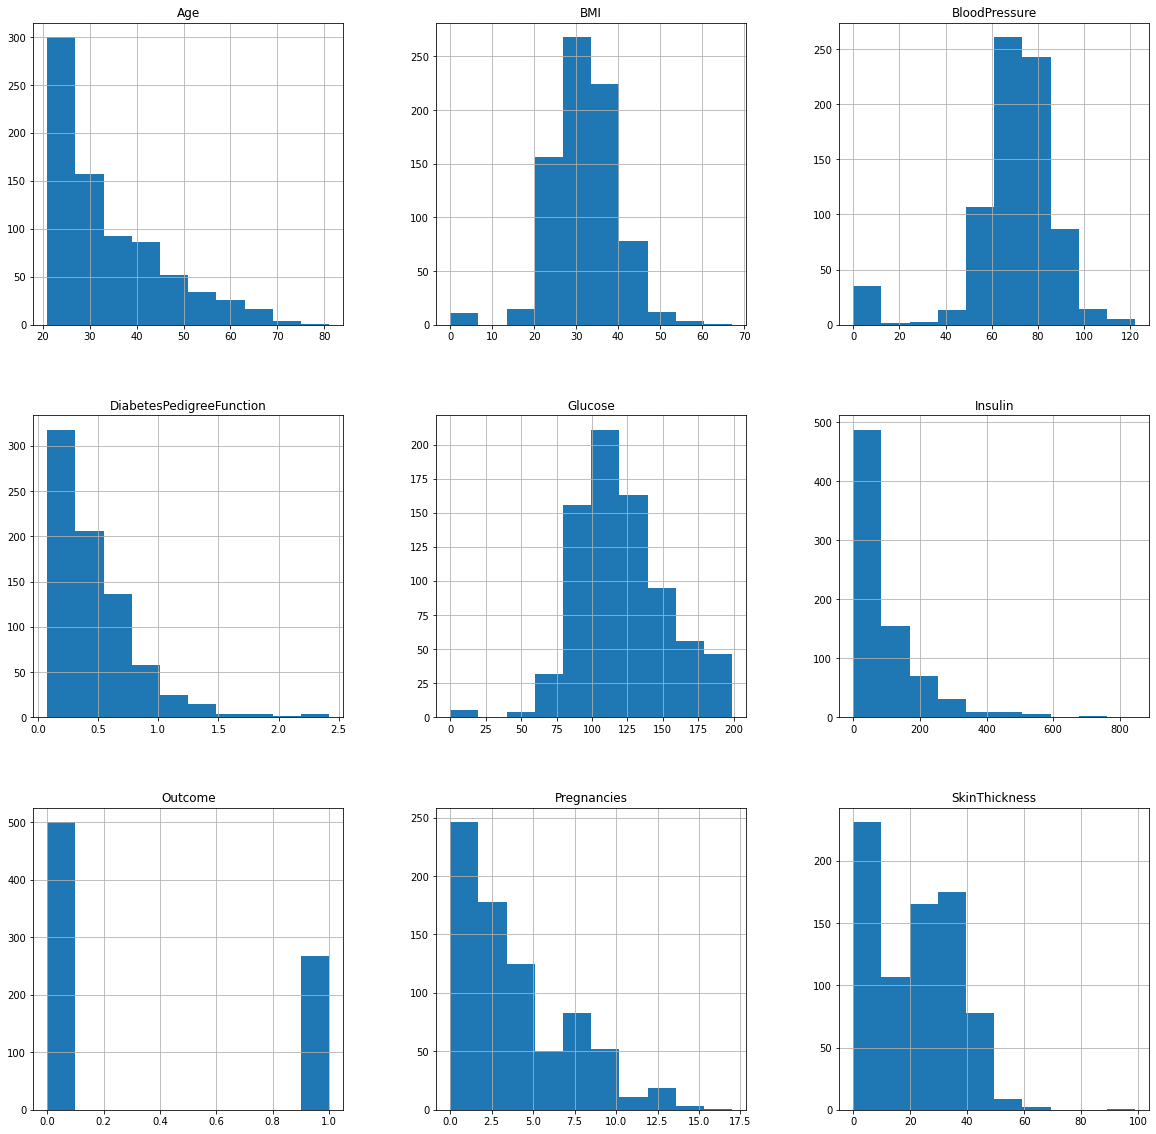

In [15]:
p = data.hist(figsize = (20,20))

In [17]:
diabetes_data_copy['Glucose'].fillna(diabetes_data_copy['Glucose'].mean(), inplace = True)
diabetes_data_copy['BloodPressure'].fillna(diabetes_data_copy['BloodPressure'].mean(), inplace = True)
diabetes_data_copy['SkinThickness'].fillna(diabetes_data_copy['SkinThickness'].median(), inplace = True)
diabetes_data_copy['Insulin'].fillna(diabetes_data_copy['Insulin'].median(), inplace = True)
diabetes_data_copy['BMI'].fillna(diabetes_data_copy['BMI'].median(), inplace = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8d0a3292d0>,
      dtype=object)

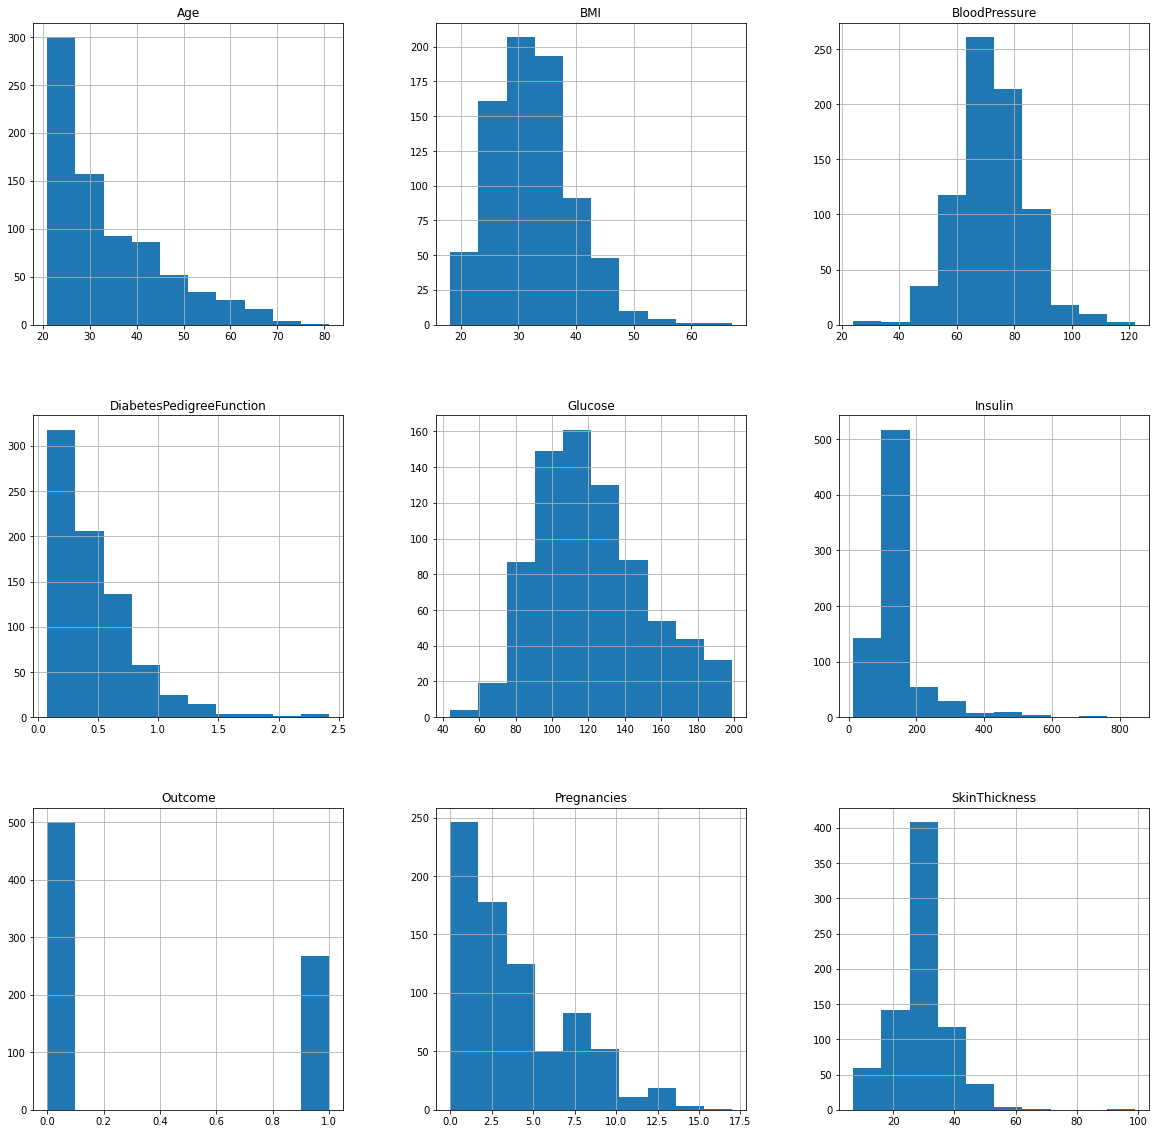

In [19]:
p = diabetes_data_copy.hist(figsize = (20,20))

In [20]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(diabetes_data_copy.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [26]:
diabetes_data_copy = diabetes_data_copy.sample(frac=1, random_state=0).reset_index(drop=True)
X = diabetes_data_copy[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']] 
y = diabetes_data_copy[['Outcome']]

X_test = X.loc[:230, :]
X_rest = X.loc[230:, :]
X_validation = X_rest.loc[231:391, :]
X_train = X_rest.loc[392:, :]

y_test = y.loc[:230, :]
y_rest = y.loc[230:, :]
y_validation = y_rest.loc[231:391, :]
y_train = y_rest.loc[392:, :]

In [27]:
X_rest

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
230,1,119.0,54.000000,13.0,50.0,22.3,0.205,24
231,6,115.0,60.000000,39.0,125.0,33.7,0.245,40
232,0,117.0,72.405184,29.0,125.0,33.8,0.932,44
233,7,159.0,66.000000,29.0,125.0,30.4,0.383,36
234,5,99.0,74.000000,27.0,125.0,29.0,0.203,32
...,...,...,...,...,...,...,...,...
763,10,101.0,76.000000,48.0,180.0,32.9,0.171,63
764,9,89.0,62.000000,29.0,125.0,22.5,0.142,33
765,2,142.0,82.000000,18.0,64.0,24.7,0.761,21
766,2,106.0,56.000000,27.0,165.0,29.0,0.426,22
